# Transforming dataset from FIZ to a format compatible with Google seeds and classes

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 100)

## Loading data

In [3]:
seed_name = 'diesel'
filename = 'diesel_epfull_dataset2.csv'
src_dir = "."

df = pd.read_csv(src_dir + "/data/" + filename, index_col=0, na_filter=False) #empty strings inserted where no data present

In [4]:
print(df.shape)
df.head()

(4702, 13)


,AN,PN,TIEN,ABEN,CLAIMS,KT,DS,IPC,PD,AD,PRD,PA,IN
row ID,,,,,,,,,,,,,
1,2018095213,EP 3435021,ALUMINUM PLATE AND COOLER HAVING THE SAME,An aluminum plate and an EGR cooler may include a cooler which cools exhaust gas recirculating f...,"1. A cooler apparatus, comprising:, a housing in which an internal space is formed;, tubes dispo...","exhaust gas recirculating, exhaust gas flow, aluminum plate, egr cooler, core layer, cooler appa...","AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, FR, GB, GR, HR, HU, IE, IS, IT, LI, LT, LU, LV, ...","F28F0021/08, F28D0007/16, F28D0021/00, F28F0021/08, F28D0007/16, F28D0021/00",20190130,20180205,20170728,"Hyundai Motor Company,Â 12 Heolleung-ro Seocho-gu, Seoul 06797,Â Korea, Republic of (KR)Â (EPO-N...","LEE, Dong Young,Â C/O Intellectual Property Team 1 Hyundai MotorCompany 150 Hyundaiyeonguso-ro N..."
2,2018091406,EP 3431730,FLUID SPRAY INJECTORS,A fluid spray nozzle tip (100;200) can include a feed hole body (101) that defines at least one ...,"1. A fluid spray nozzle tip, comprising:, a feed hole body that defines at least one feed hole a...","fluid spray, feed hole body, pintle sealing surface body, feed hole axis, rapid spray cone devel...","AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, FR, GB, GR, HR, HU, IE, IS, IT, LI, LT, LU, LV, ...","F01N0003/20, F02M0061/16, F02M0061/18, F01N0003/20, F02M0061/16, F02M0061/18",20190123,20180704,20170719,"Delavan, Inc.,Â 811 4th Street, West Des Moines IA 50265,Â United States (US)Â (EPO-Number: 1013...","TIBBS, Andy W.,Â 240 NW 7th Street, Earlham IA Iowa 50072,Â United States (US), BUELOW, Philip E..."
3,2018087099,EP 3428440,POLLUTANT ABATEMENT SYSTEM FOR AN INTERNAL COMBUSTION ENGINE AND INTERNAL COMBUSTION ENGINE COMP...,A system for the abatement of the pollutants produced by an internal combustion engine (E) havin...,1. A system for the abatement of the pollutants produced by an internal combustion engine (E) ha...,"pollutant abatement system, treatment portion, ats portion, exhaust gas flow, recirculated exhau...","AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, FR, GB, GR, HR, HU, IE, IS, IT, LI, LT, LU, LV, ...","F02M0026/06, F02M0026/14, F01N0003/20, F01N0003/08, F01N0009/00, F01N0003/032, F01N0003/10, F02D...",20190116,20180713,20170713,"FPT Industrial S.p.A.,Â Via Puglia 15, 10156 Torino,Â Italy (IT)Â (EPO-Number: 101287722)","D'EPIRO, Clino,Â Via Mazzini 32/P, 10091 Alpignano (TO),Â Italy (IT)"
4,2018087098,EP 3428415,"POLLUTANT ABATEMENT SYSTEM OF AN INTERNAL COMBUSTION ENGINE, INTERNAL COMBUSTION ENGINE COMPRISI...",An abatement system of pollutants produced by an internal combustion engine (E) having an intake...,1. An abatement system of pollutants produced by an internal combustion engine (E) having an int...,"treatment portion, combustion engine, exhaust gas, bypass duct bpin inlet, nox conversion device...","AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, FR, GB, GR, HR, HU, IE, IS, IT, LI, LT, LU, LV, ...","F01N0003/08, F01N0003/20, F02M0026/00, F02M0026/06, F02M0026/15, F02M0026/35, F01N0003/08, F01N0...",20190116,20180713,20170713,"FPT Industrial S.p.A.,Â Via Puglia 15, 10156 Torino,Â Italy (IT)Â (EPO-Number: 101287722)","D'EPIRO, Clino,Â Via Mazzini 32/P, 10091 Alpignano (TO),Â Italy (IT)"
5,2018086446,EP 3428414,"DEVICE AND METHOD FOR EXHAUST GAS CLEANING SYSTEMS OF A DIESEL VEHICLE, IN PARTICULAR FOR RETROF...",NULL,"1. Vorrichtung fÃ¼r Abgasreinigungssysteme von Dieselfahrzeugen, insbesondere zur NachrÃ¼stung v...","dieselparticlefilter, diesel vehicle, exhaust gas cleaning system, city centre","AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, FR, GB, GR, HR, HU, IE, IS, IT, LI, LT, LU, LV, ...","F01N0003/08, F01N0003/10, F01N0003/20, F01N0003/36, F01N0009/00, F01N0011/00, F01N0013/00, F01N0...",20190116,20180709,20170711,"Torsten Goldbach,Â Hattroper Weg 34, 59494 Soest,Â Germany (DE)Â (EPO-Number: 101755503)","Torsten Goldbach,Â Hattroper Weg 34, 59494 Soest,Â Germany (DE)"


In [5]:
df['country_code'] = df['PN'].map(lambda x: x[:2])

In [6]:
df['pub_num'] = df['PN'].map(lambda x: x[3:])
df['publication_number'] = df['PN'].map(lambda x: x.replace(" ", "-"))

In [7]:
def parse_assignees(s):
    assignees_uppercase = set()
    assignees = list()
    
    addresses = s.split('), ')
            
    for a in addresses:
        assignee = a[:a.find(',Â')].replace(',', '')
        if not (assignee.upper() in assignees_uppercase):
            assignees.append(assignee)
            assignees_uppercase.add(assignee.upper())
    return ','.join(assignees)

df['assignees_harmonized'] = df['PA'].map(lambda x: parse_assignees(x))

In [8]:
def format_ipcs(s):
    long_ipcs = s.split(', ')
    ipcs = list()
    for long_ipc in long_ipcs:
        ipc = long_ipc[:5] + long_ipc[7:]
        ipcs.append(ipc)
    return ','.join(ipcs)

df['ipcs'] = df['IPC'].map(lambda x: format_ipcs(x))

### Renaming columns for consistency

In [9]:
new_names = {"AN": "family_id", "TIEN": "title_text", "ABEN": "abstract_text", 
           "CLAIMS": "claims_text", "KT": "legacy_terms", 'PRD': 'priority_date'}
df.rename(columns=new_names, inplace=True)

### Removing columns that are not used

In [10]:
df.drop(columns=['PN','DS', 'IPC', 'PD', 'AD', 'PA', 'IN'], inplace=True)

### Resetting index

In [11]:
df.reset_index(inplace=True)
df.drop(columns=["row ID"], inplace=True)

### Keep missing metadata empty for now

In [12]:
df['refs'] = ""
df['cpcs'] = ""

In [13]:
df['ExpansionLevel'] = 'Seed'

In [14]:
print(df.shape)
df.head()

(4702, 14)


,family_id,title_text,abstract_text,claims_text,legacy_terms,priority_date,country_code,pub_num,publication_number,assignees_harmonized,ipcs,refs,cpcs,ExpansionLevel
0,2018095213,ALUMINUM PLATE AND COOLER HAVING THE SAME,An aluminum plate and an EGR cooler may include a cooler which cools exhaust gas recirculating f...,"1. A cooler apparatus, comprising:, a housing in which an internal space is formed;, tubes dispo...","exhaust gas recirculating, exhaust gas flow, aluminum plate, egr cooler, core layer, cooler appa...",20170728,EP,3435021,EP-3435021,"Hyundai Motor Company,Kia Motors Corporation","F28F01/08,F28D07/16,F28D01/00,F28F01/08,F28D07/16,F28D01/00",,,Seed
1,2018091406,FLUID SPRAY INJECTORS,A fluid spray nozzle tip (100;200) can include a feed hole body (101) that defines at least one ...,"1. A fluid spray nozzle tip, comprising:, a feed hole body that defines at least one feed hole a...","fluid spray, feed hole body, pintle sealing surface body, feed hole axis, rapid spray cone devel...",20170719,EP,3431730,EP-3431730,Delavan Inc.,"F01N03/20,F02M01/16,F02M01/18,F01N03/20,F02M01/16,F02M01/18",,,Seed
2,2018087099,POLLUTANT ABATEMENT SYSTEM FOR AN INTERNAL COMBUSTION ENGINE AND INTERNAL COMBUSTION ENGINE COMP...,A system for the abatement of the pollutants produced by an internal combustion engine (E) havin...,1. A system for the abatement of the pollutants produced by an internal combustion engine (E) ha...,"pollutant abatement system, treatment portion, ats portion, exhaust gas flow, recirculated exhau...",20170713,EP,3428440,EP-3428440,FPT Industrial S.p.A.,"F02M06/06,F02M06/14,F01N03/20,F01N03/08,F01N09/00,F01N03/032,F01N03/10,F02D01/14,F01N03/025,F01N...",,,Seed
3,2018087098,"POLLUTANT ABATEMENT SYSTEM OF AN INTERNAL COMBUSTION ENGINE, INTERNAL COMBUSTION ENGINE COMPRISI...",An abatement system of pollutants produced by an internal combustion engine (E) having an intake...,1. An abatement system of pollutants produced by an internal combustion engine (E) having an int...,"treatment portion, combustion engine, exhaust gas, bypass duct bpin inlet, nox conversion device...",20170713,EP,3428415,EP-3428415,FPT Industrial S.p.A.,"F01N03/08,F01N03/20,F02M06/00,F02M06/06,F02M06/15,F02M06/35,F01N03/08,F01N03/20,F02M06/00,F02M06...",,,Seed
4,2018086446,"DEVICE AND METHOD FOR EXHAUST GAS CLEANING SYSTEMS OF A DIESEL VEHICLE, IN PARTICULAR FOR RETROF...",NULL,"1. Vorrichtung fÃ¼r Abgasreinigungssysteme von Dieselfahrzeugen, insbesondere zur NachrÃ¼stung v...","dieselparticlefilter, diesel vehicle, exhaust gas cleaning system, city centre",20170711,EP,3428414,EP-3428414,Torsten Goldbach,"F01N03/08,F01N03/10,F01N03/20,F01N03/36,F01N09/00,F01N01/00,F01N03/00,F01N03/08,F01N03/10,F01N03...",,,Seed


In [15]:
from langid.langid import LanguageIdentifier, model

def remove_other_languages(claims, identifier):
    idx = claims.find('<b>Claims (German)</b>') # after this phrase only translations to german and french follow
    
    cleaned = claims
    if idx > -1:
        cleaned = claims[:idx]
        
    #still some german and french phrases left. Detecting and removing them
    english_sentences = []
    sentences = cleaned.split(".")
    for sentence in sentences:
        lang = identifier.classify(sentence)[0]
        if (lang == "en"):
            english_sentences.append(sentence)
            
    return ".".join(english_sentences)

identifier = LanguageIdentifier.from_modelstring(model)
identifier.set_languages(['de','fr','en'])

stats = df.copy()
stats['claims_eng'] = df['claims_text'].apply(lambda x: remove_other_languages(x, identifier))

In [16]:
stats['words_in_claims'] = df['claims_text'].apply(lambda x: len(x.split()))
stats['words_in_claims_eng'] = stats['claims_eng'].apply(lambda x: len(x.split()))

1862.1571671629094


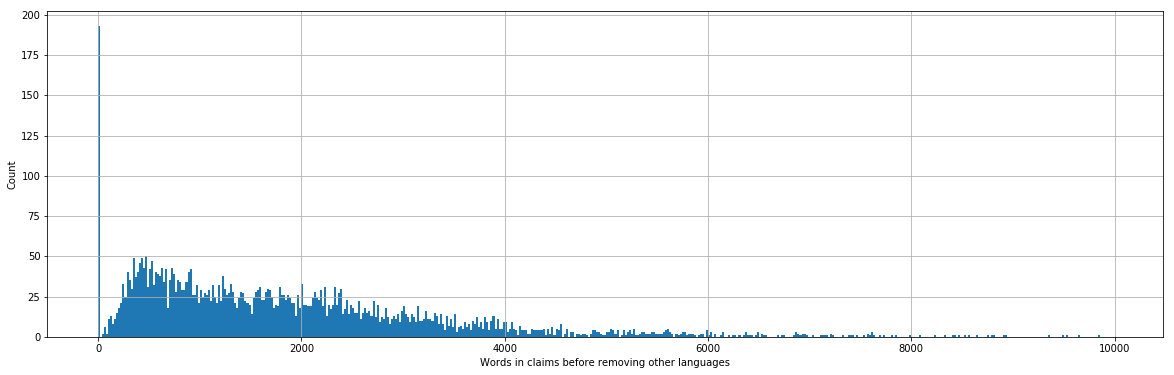

In [17]:
import matplotlib.pyplot as plt

lens = stats.words_in_claims
plt.subplots(figsize=(20,6))
lens.hist(bins = np.arange(0,10000,20))
plt.xlabel('Words in claims before removing other languages')
plt.ylabel('Count')
print(np.mean(stats.words_in_claims))

958.955338153977


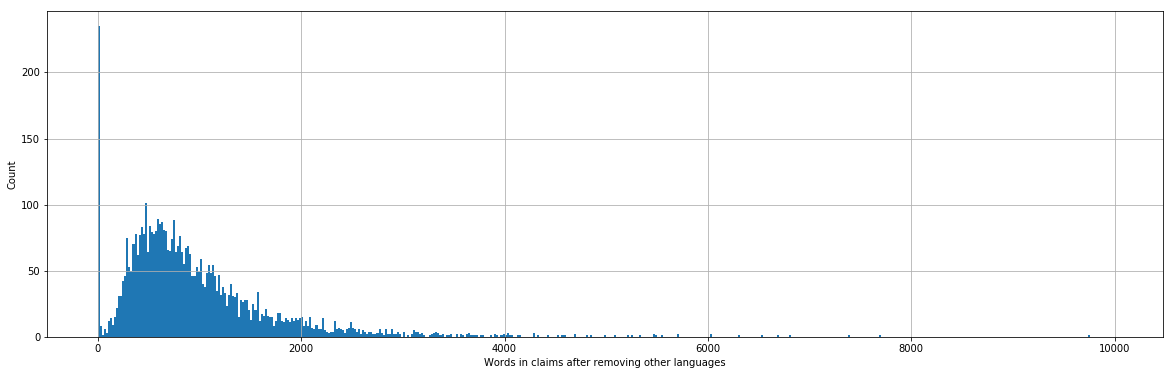

In [18]:
lens = stats.words_in_claims_eng
plt.subplots(figsize=(20,6))
lens.hist(bins = np.arange(0,10000,20))
plt.xlabel('Words in claims after removing other languages')
plt.ylabel('Count')
print(np.mean(stats.words_in_claims_eng))

In [19]:
df['claims_text'] = stats['claims_eng']

#df.index = df.index.astype(int)
#df.set_index("publication_number", inplace=True)

df.head()

,family_id,title_text,abstract_text,claims_text,legacy_terms,priority_date,country_code,pub_num,publication_number,assignees_harmonized,ipcs,refs,cpcs,ExpansionLevel
0,2018095213,ALUMINUM PLATE AND COOLER HAVING THE SAME,An aluminum plate and an EGR cooler may include a cooler which cools exhaust gas recirculating f...,"1. A cooler apparatus, comprising:, a housing in which an internal space is formed;, tubes dispo...","exhaust gas recirculating, exhaust gas flow, aluminum plate, egr cooler, core layer, cooler appa...",20170728,EP,3435021,EP-3435021,"Hyundai Motor Company,Kia Motors Corporation","F28F01/08,F28D07/16,F28D01/00,F28F01/08,F28D07/16,F28D01/00",,,Seed
1,2018091406,FLUID SPRAY INJECTORS,A fluid spray nozzle tip (100;200) can include a feed hole body (101) that defines at least one ...,"1. A fluid spray nozzle tip, comprising:, a feed hole body that defines at least one feed hole a...","fluid spray, feed hole body, pintle sealing surface body, feed hole axis, rapid spray cone devel...",20170719,EP,3431730,EP-3431730,Delavan Inc.,"F01N03/20,F02M01/16,F02M01/18,F01N03/20,F02M01/16,F02M01/18",,,Seed
2,2018087099,POLLUTANT ABATEMENT SYSTEM FOR AN INTERNAL COMBUSTION ENGINE AND INTERNAL COMBUSTION ENGINE COMP...,A system for the abatement of the pollutants produced by an internal combustion engine (E) havin...,1. A system for the abatement of the pollutants produced by an internal combustion engine (E) ha...,"pollutant abatement system, treatment portion, ats portion, exhaust gas flow, recirculated exhau...",20170713,EP,3428440,EP-3428440,FPT Industrial S.p.A.,"F02M06/06,F02M06/14,F01N03/20,F01N03/08,F01N09/00,F01N03/032,F01N03/10,F02D01/14,F01N03/025,F01N...",,,Seed
3,2018087098,"POLLUTANT ABATEMENT SYSTEM OF AN INTERNAL COMBUSTION ENGINE, INTERNAL COMBUSTION ENGINE COMPRISI...",An abatement system of pollutants produced by an internal combustion engine (E) having an intake...,1. An abatement system of pollutants produced by an internal combustion engine (E) having an int...,"treatment portion, combustion engine, exhaust gas, bypass duct bpin inlet, nox conversion device...",20170713,EP,3428415,EP-3428415,FPT Industrial S.p.A.,"F01N03/08,F01N03/20,F02M06/00,F02M06/06,F02M06/15,F02M06/35,F01N03/08,F01N03/20,F02M06/00,F02M06...",,,Seed
4,2018086446,"DEVICE AND METHOD FOR EXHAUST GAS CLEANING SYSTEMS OF A DIESEL VEHICLE, IN PARTICULAR FOR RETROF...",NULL,"1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.","dieselparticlefilter, diesel vehicle, exhaust gas cleaning system, city centre",20170711,EP,3428414,EP-3428414,Torsten Goldbach,"F01N03/08,F01N03/10,F01N03/20,F01N03/36,F01N09/00,F01N01/00,F01N03/00,F01N03/08,F01N03/10,F01N03...",,,Seed


In [20]:
import pickle
import os

training_data_full_df = df
seed_patents_df = df
l1_patents_df = pd.DataFrame(columns=df.columns)
l2_patents_df = pd.DataFrame(columns=df.columns)
anti_seed_patents = pd.DataFrame(columns=df.columns)

landscape_data_path = os.path.join(src_dir + "/data/" + seed_name )
if not os.path.exists(landscape_data_path):
    os.makedirs(landscape_data_path)

with open(landscape_data_path + '/landscape_data.pkl', 'wb') as outfile:
    pickle.dump((training_data_full_df, seed_patents_df, l1_patents_df, l2_patents_df, anti_seed_patents),
                    outfile, protocol=pickle.HIGHEST_PROTOCOL)